In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

##Load Netflix Dataset

In [103]:
df=pd.read_csv("/content/netflix_titles.csv",encoding = 'latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##EDA(explotary data analysis)

In [104]:
df.shape

(8809, 26)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [106]:
# Summary of Statistics for numerical columns in dataset
df.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#***check the null value if any***

In [107]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

##***Data Cleaning***
-Handle missing values.\
-Convert data types if necessary.

In [108]:
#drop all the unnamed column from dataset
df.drop(columns=[col for col in df.columns if 'Unnamed' in col], inplace=True)

In [109]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [110]:
df.shape

(8809, 12)

##***Handle missing values***

In [111]:
# Handle missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [112]:
#check the highest number of rating
df['rating'].value_counts().to_frame().head(1)

,count
rating,
TV-MA,3208


In [113]:
#replace the missing rating with "TV-MA"
df["rating"].replace(np.nan,"TV-MA",inplace=True)

In [114]:
#drop the rating_column has missing value
#df.dropna(subset=['duration'], inplace=True)
df.dropna(subset=['date_added'], inplace=True)

In [115]:
# Separate Movies and TV Shows
movies_df = df[df['type'] == 'Movie'].copy()
tvshows_df = df[df['type'] == 'TV Show'].copy()

# Extract the numerical part from 'duration' for movies
movies_df['duration'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Calculate the average duration of movies
average_movie_duration = movies_df['duration'].mean()
print(f"Average movie duration: {average_movie_duration:.2f} minutes")

# Fill missing movie durations with the average duration
movies_df['duration'].fillna(average_movie_duration, inplace=True)

# Combine the dataframes back
df = pd.concat([movies_df, tvshows_df])

Average movie duration: 99.58 minutes


In [116]:
#check the remaining null values
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         830
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

Country column is important for our visualization & since it has some null values we can replace them by United States, since United States has the largest nummber of shows.

In [117]:
#country has highest webseries and film produce in netflix. we can replace the missing value in usa
df['country'].value_counts().to_frame().head(1)

,count
country,
United States,2813


In [118]:
#we can replace the missing value in usa
df['country'].fillna('United States', inplace=True)

In [119]:
#check the missing value after treating missing value
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#Shape of dataset

In [120]:
df.shape

(8799, 12)

In [121]:
# Summary of Statistics for numerical columns in dataset
df.describe()

,release_year
count,8799.000000
mean,2014.184566
std,8.821809
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [122]:
#check the whole dataset after treating
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...


In [123]:
# Exploratory data Analysis
df['type'].value_counts()

type
Movie      6132
TV Show    2667
Name: count, dtype: int64

##Movies and TV show compaired

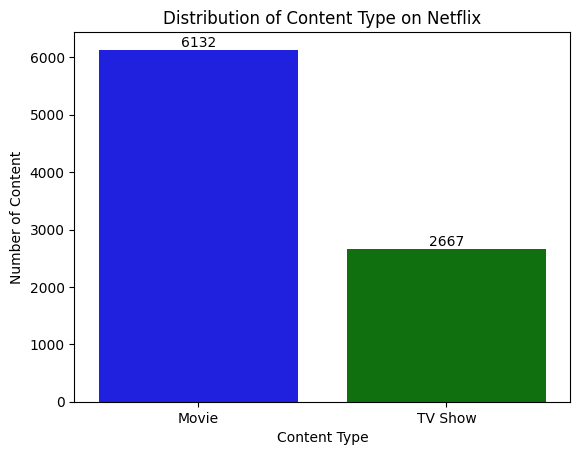

In [124]:
# Analysing number of Movies and TV show present in the dataset
ax = sns.countplot(x='type', data=df,palette={'Movie': 'blue', 'TV Show': 'green'})
ax.set_title("Distribution of Content Type on Netflix")
ax.set_xlabel("Content Type")
ax.set_ylabel("Number of Content")
for label in ax.containers:
    ax.bar_label(label)

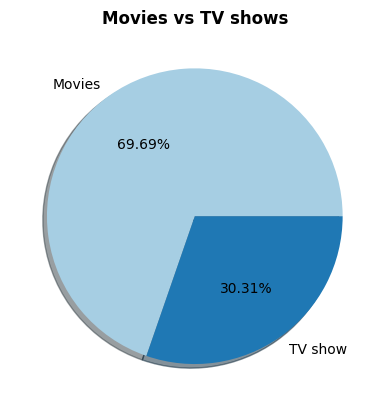

In [125]:
#Movies and TV show compaired
size = df['type'].value_counts()
labels = 'Movies', 'TV show'
color = sns.color_palette('Paired')

plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%', shadow=bool)
plt.title('Movies vs TV shows', fontweight='bold')
plt.show()

#Top 5 countries with most production of Movies and TV shows

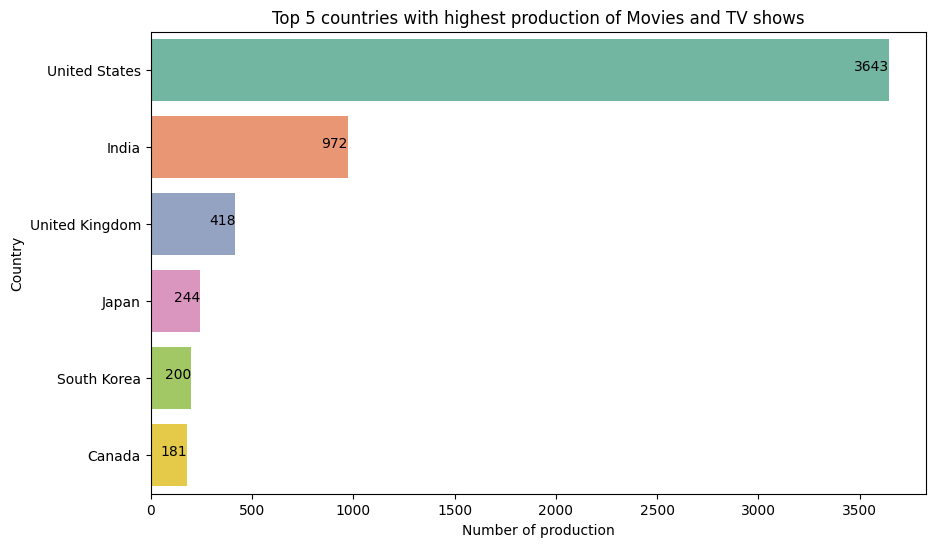

In [126]:
# Top 5 countries with most production of Movies and TV shows
top_5 = df['country'].value_counts().head(6)

# Plotting
plt.figure(figsize=(10, 6))
bx = sns.barplot(y=top_5.index, x=top_5.values, palette='Set2')
bx.set_title("Top 5 countries with highest production of Movies and TV shows")
bx.set_xlabel("Number of production")
bx.set_ylabel("Country")
# Adding numbers on each bar
for index, value in enumerate(top_5.values):
    bx.text(value, index, str(value), color='black', ha="right")
plt.show()# Adding numbers on each bar
for index, value in enumerate(top_5.values):
    bx.text(value, index, str(value), color='black', ha="right")

#Top 5 countries with the highest number of Movies produced

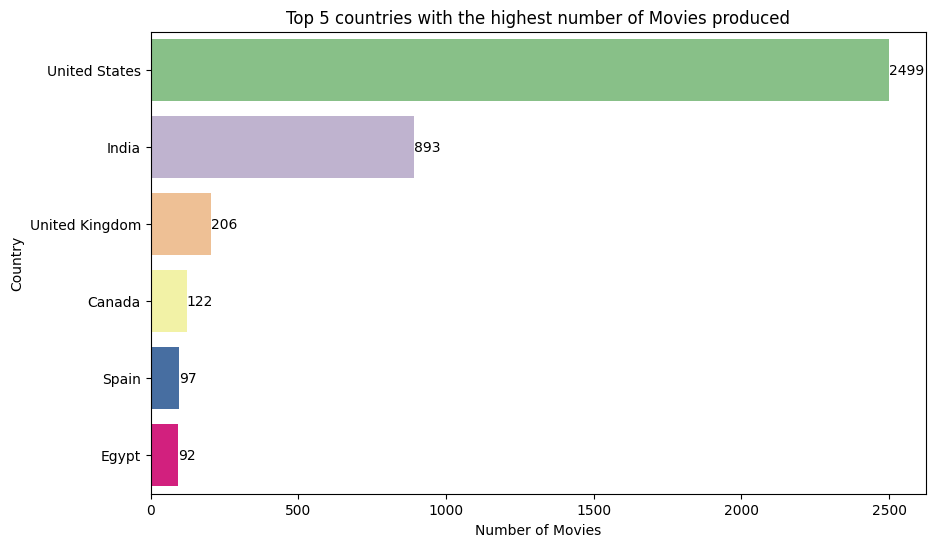

In [127]:
# Top 5 countries with the highest number of Movies produced
top_5_m = df[df.type == 'Movie']
count_per_year = top_5_m.country.value_counts().head(6)

# Plotting
plt.figure(figsize=(10, 6))
cx = sns.barplot(y=count_per_year.index, x=count_per_year.values, palette='Accent')
cx.set_title("Top 5 countries with the highest number of Movies produced")
cx.set_xlabel("Number of Movies")
cx.set_ylabel("Country")
# Adding counts above each bar
for index, value in enumerate(count_per_year.values):
    cx.text(value, index, str(value), ha='left', va='center')
plt.show()


#Top 5 countries with the highest number of TV Shows produced

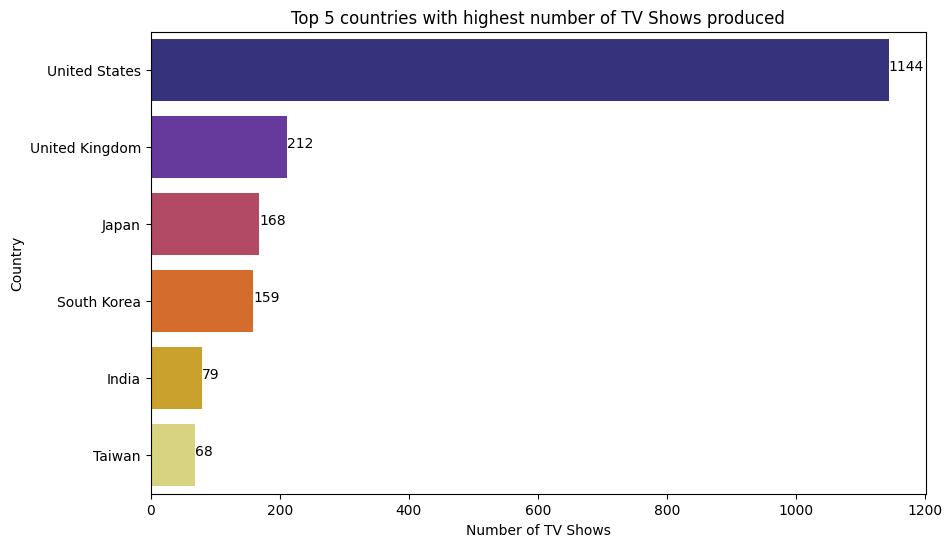

In [128]:
# Top 5 countries with the highest number of TV Shows produced
top_5_tv = df[df.type == 'TV Show']
count_per_year = top_5_tv.country.value_counts().head(6)

# Plotting
plt.figure(figsize=(10, 6))
dx = sns.barplot(y=count_per_year.index, x=count_per_year.values, palette='CMRmap')
dx.set_title("Top 5 countries with highest number of TV Shows produced")
dx.set_xlabel("Number of TV Shows")
dx.set_ylabel("Country")

# Adding numbers on each bar
for index, value in enumerate(count_per_year.values):
    dx.text(value, index, str(value), color='black', ha="left")

plt.show()

#Content released per yearWise in Netflix

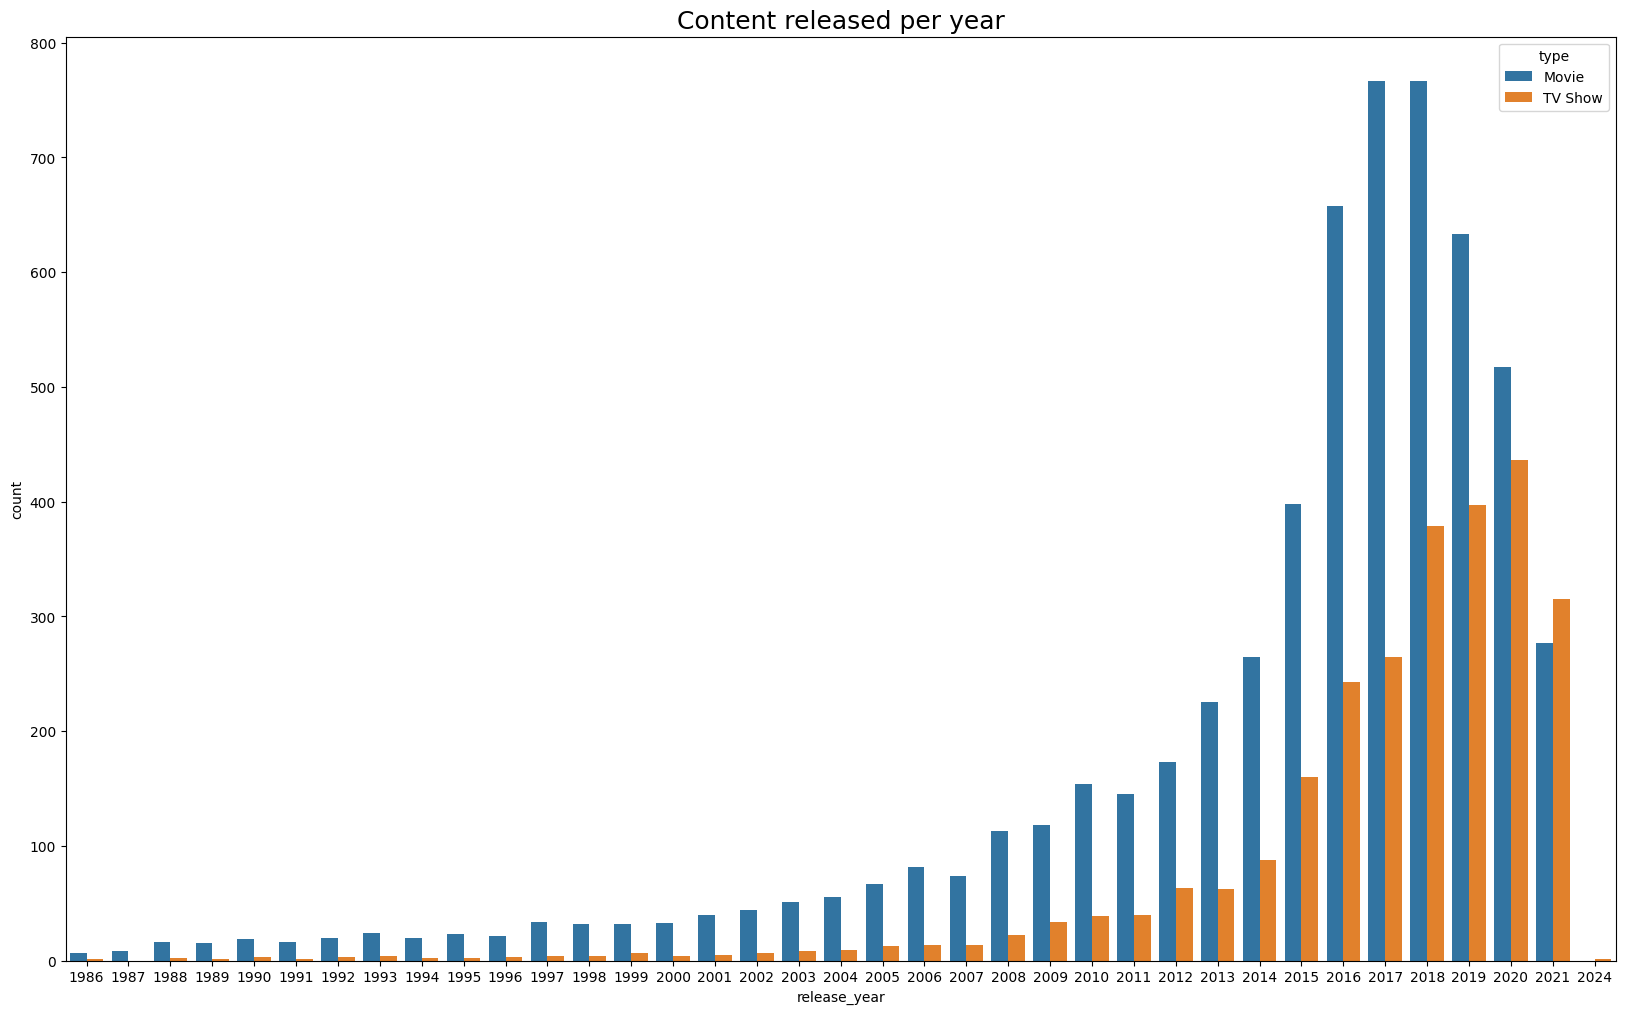

In [129]:
#Yearwise comparision between Movies and Tvshow
plt.figure(figsize=(20,12))
sns.countplot(x='release_year',hue='type', data=df.sort_values(by='release_year')[-1:200:-1]);
plt.title('Content released per year', size=18)
plt.show()

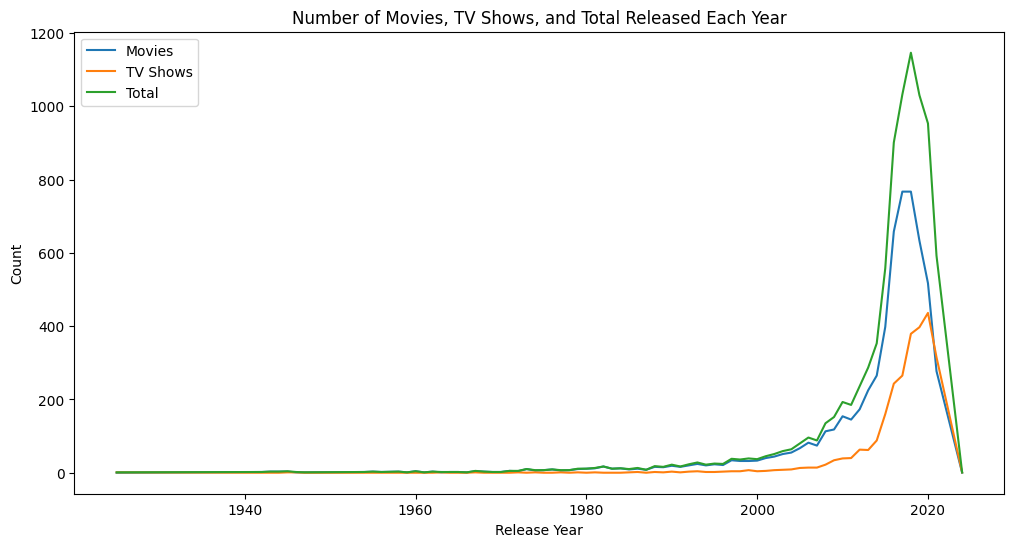

In [130]:
# Analysing number of Movies, TV Shiws and Total Released each year
# Group the data by 'release_year' and 'type', and count the occurrences
type_counts = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Calculate the total count of movies and TV shows each year
type_counts['total'] = type_counts['Movie'] + type_counts['TV Show']

# Reset the index to make 'release_year' a column
type_counts = type_counts.reset_index()

# Plotting using Seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=type_counts, x='release_year', y='Movie', label='Movies')
sns.lineplot(data=type_counts, x='release_year', y='TV Show', label='TV Shows')
sns.lineplot(data=type_counts, x='release_year', y='total', label='Total')
plt.title('Number of Movies, TV Shows, and Total Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

#Top 10 Movie directors on Netflix, excluding 'Unknown'

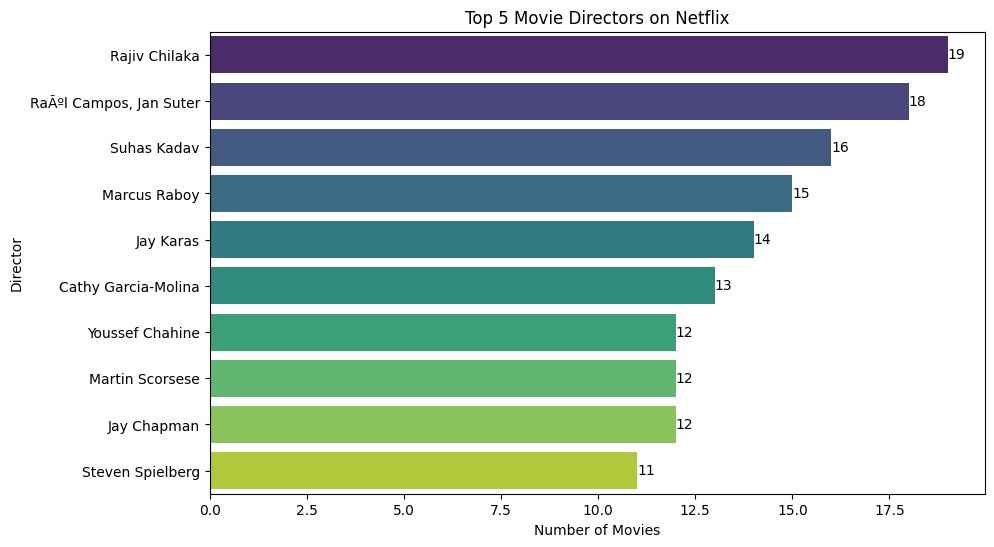

In [131]:
# Top 10 Movie directors on Netflix, excluding 'Unknown'
top_movies_director = df[df['type'] == 'Movie']['director'].value_counts()
top_movies_director = top_movies_director.drop('Unknown', errors='ignore').head(10)

# Plotting using Seaborn bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_movies_director.index, x=top_movies_director.values, palette='viridis')
ax.set_title("Top 5 Movie Directors on Netflix")
ax.set_xlabel("Number of Movies")
ax.set_ylabel("Director")

# Adding numbers on each bar
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Highest number of rating in bar distribution

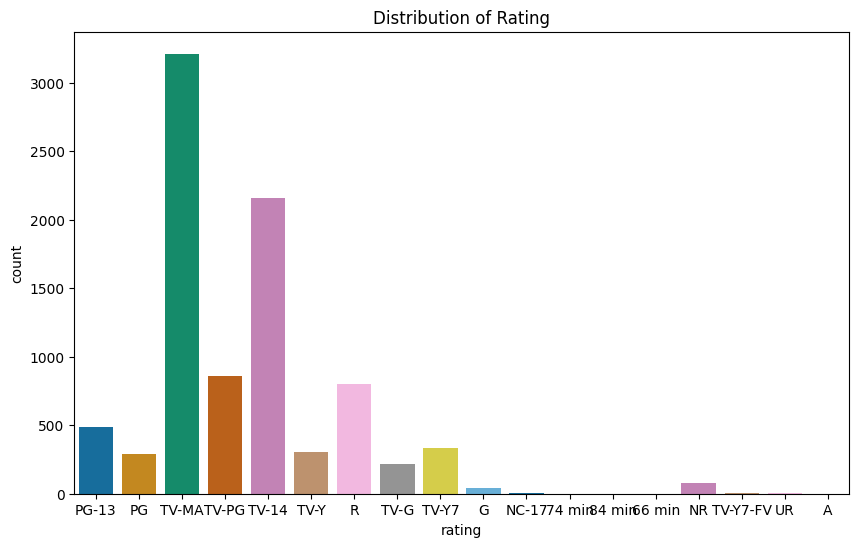

In [132]:
#highest number of rating in bar distribution
plt.figure(figsize=(10,6))
sns.countplot(x=df['rating'], data=df, palette='colorblind')
plt.title('Distribution of Rating')
plt.show()

# calculate what content does each country release in netflix

In [133]:
#  calculate what content does each country release in netflix
df_new =df.groupby(df["listed_in"])["country"].value_counts()
# Show only the top 20 most produced genres per counrty.
df_new.sort_values(ascending=False).head(20).to_frame()

,,count
listed_in,country,
Documentaries,United States,265
Stand-Up Comedy,United States,240
Children & Family Movies,United States,150
"Comedies, Dramas, International Movies",India,120
Kids' TV,United States,120
"Dramas, International Movies",India,118
"Children & Family Movies, Comedies",United States,110
"Dramas, Independent Movies, International Movies",India,108
Dramas,United States,90


<Axes: xlabel='type'>

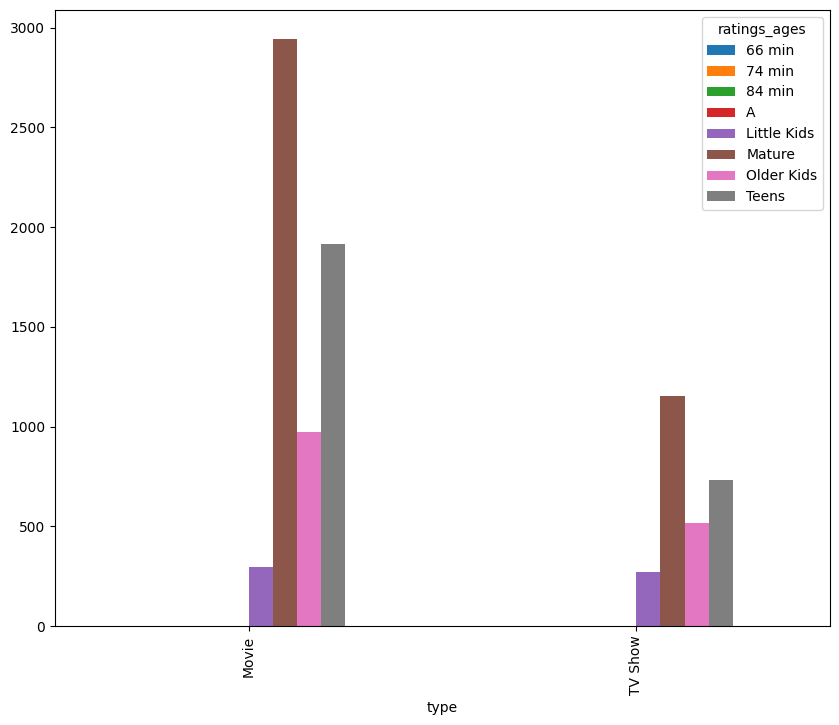

In [136]:
#checking the type of films that adult And kid
# Creating a dictionary for ratings.
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Mature',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Mature',
    'TV-Y': 'Little Kids',
    'NR': 'Mature',
    'PG-13': 'Teens',
    'TV-G': 'Little Kids',
    'PG': 'Older Kids',
    'G': 'Little Kids',
    'UR': 'Mature',
    'NC-17': 'Mature'
}

# Add a new column 'rating_ages' to our dataframe based on the above dictionary
df["ratings_ages"] = df["rating"].replace(ratings_ages)

pd.crosstab(df["type"],df["ratings_ages"]).plot(kind="bar", figsize=(10,8))

#As shown above the Movies & TV Shows with a rating of TV-MA are in the clear majority. Next up is TV-14, TV-PG and R, which consists mostly of Movies.

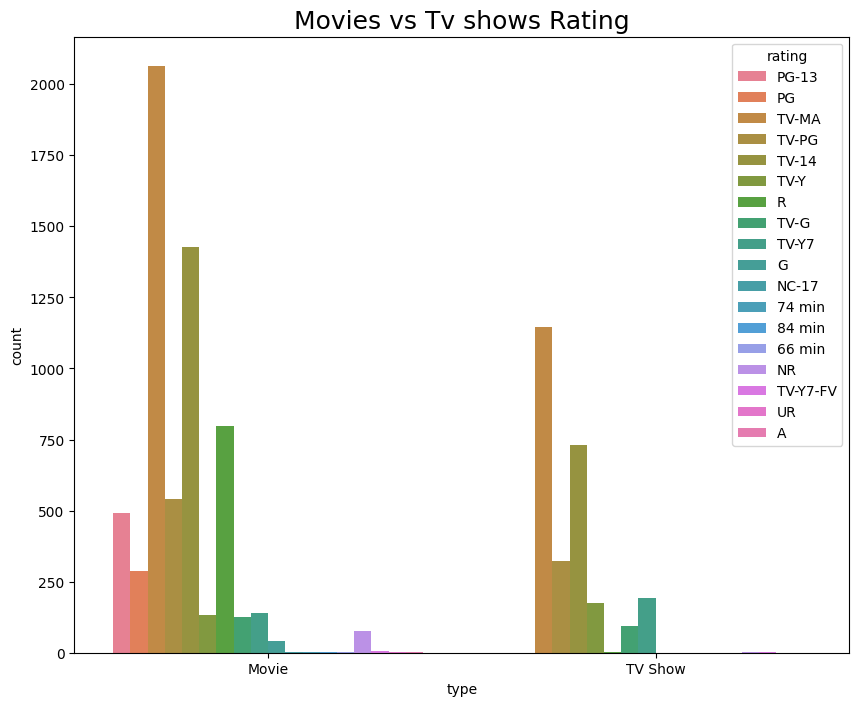

In [137]:
plt.figure(figsize=(10,8))
# Then differentiate the ratings for Movies and TV Shows
sns.countplot(x='type',hue='rating',data=df)
plt.title("Movies vs Tv shows Rating", size=18)
plt.show();

#type of categories(genre) of movies that produced

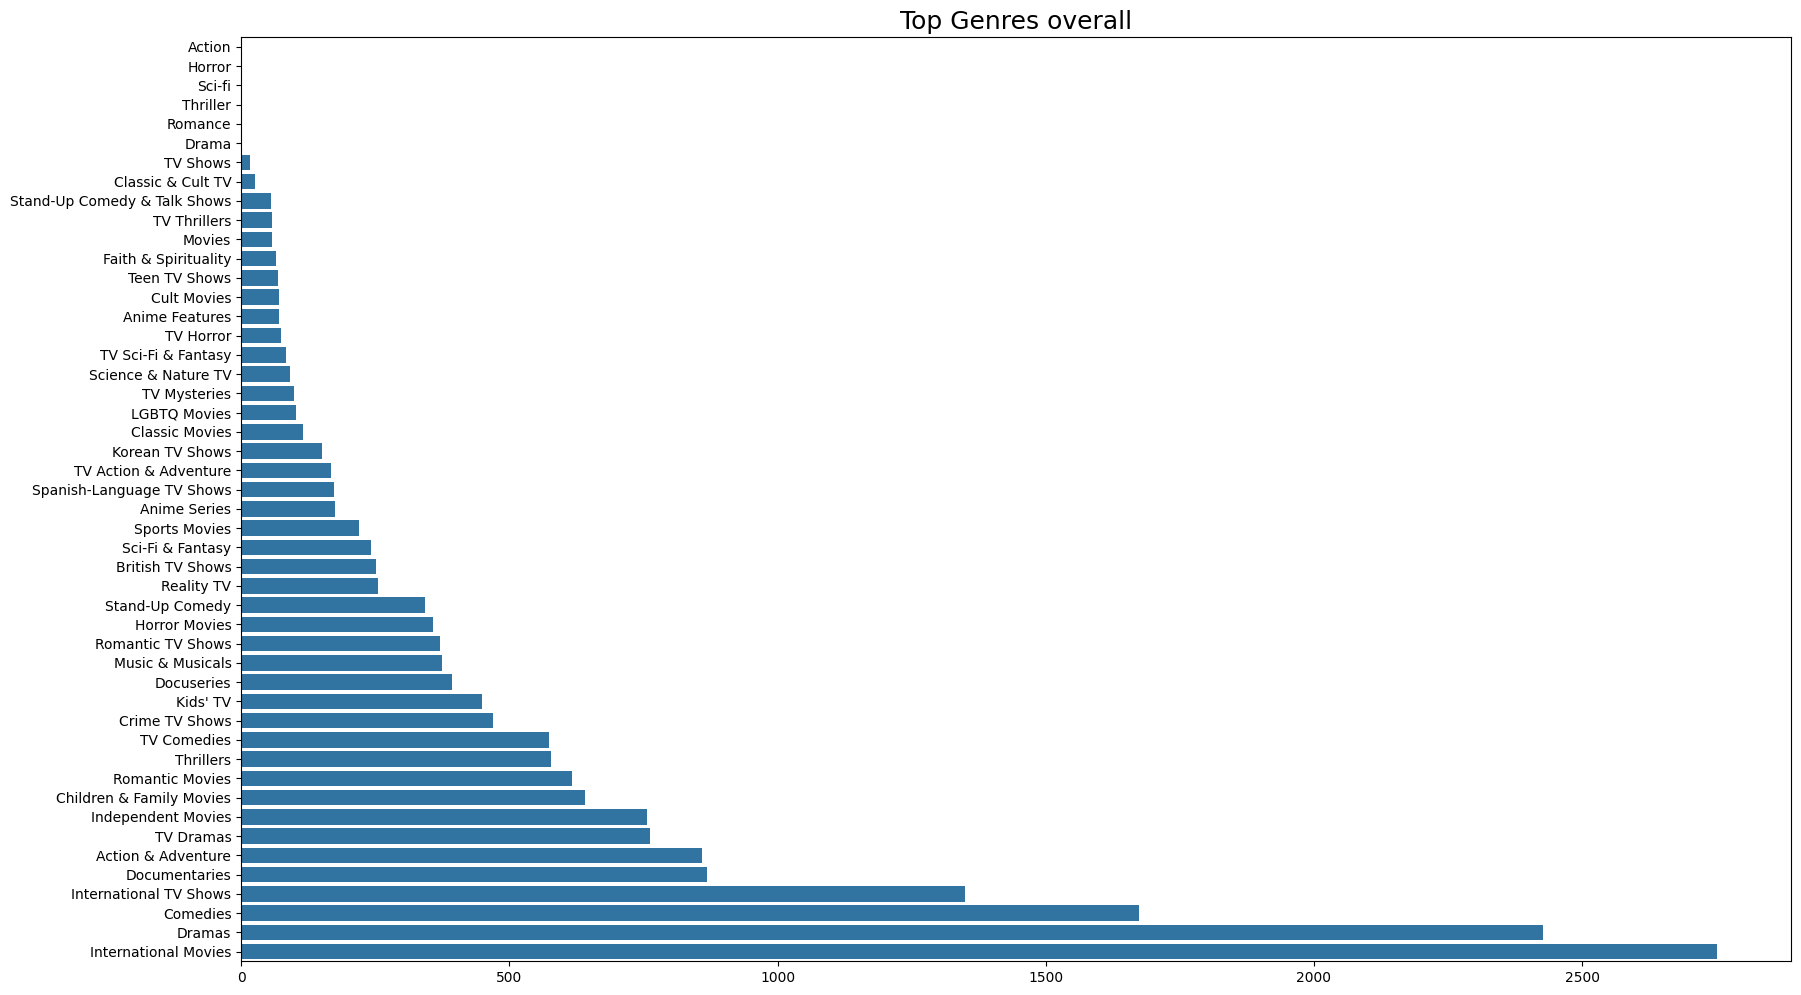

In [139]:
categories = ", ".join(df['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

plt.figure(figsize=(20,12))
sns.barplot(y=labels, x=values)
plt.title('Top Genres overall', size=18);

It is clear that International Movies is the most common genre used in Netflix content. This actually makes sense given the fact that Netflix has many countries producing content and cooperating with each other.

#Extract season from the duration column

In [144]:
# Create a new column 'season_count' based on the 'duration' column
df['season_count'] = df['duration'].str.extract('(\d+)').astype(float)

# Filter the DataFrame for TV Shows only
season_df = df[df['type'] == 'TV Show']

# Sort the DataFrame by 'season_count' in descending order
sorted_season_df = season_df.sort_values(by='season_count', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(sorted_season_df[['type', 'title', 'season_count']])

         type                                           title  season_count
0     TV Show                                  Grey's Anatomy          17.0
1     TV Show                                            NCIS          15.0
2     TV Show                                    Supernatural          15.0
3     TV Show                          COMEDIANS of the world          13.0
4     TV Show                                       Heartland          13.0
...       ...                                             ...           ...
2662  TV Show                                The Road to Love           1.0
2663  TV Show  The Prince of Tennis ~ Match! Tennis Juniors ~           1.0
2664  TV Show                                          V Wars           1.0
2665  TV Show                                  Triad Princess           1.0
2666  TV Show                              Parasyte: The Grey           1.0

[2667 rows x 3 columns]


#Top 15 TV Shows sorted by the highest number of season

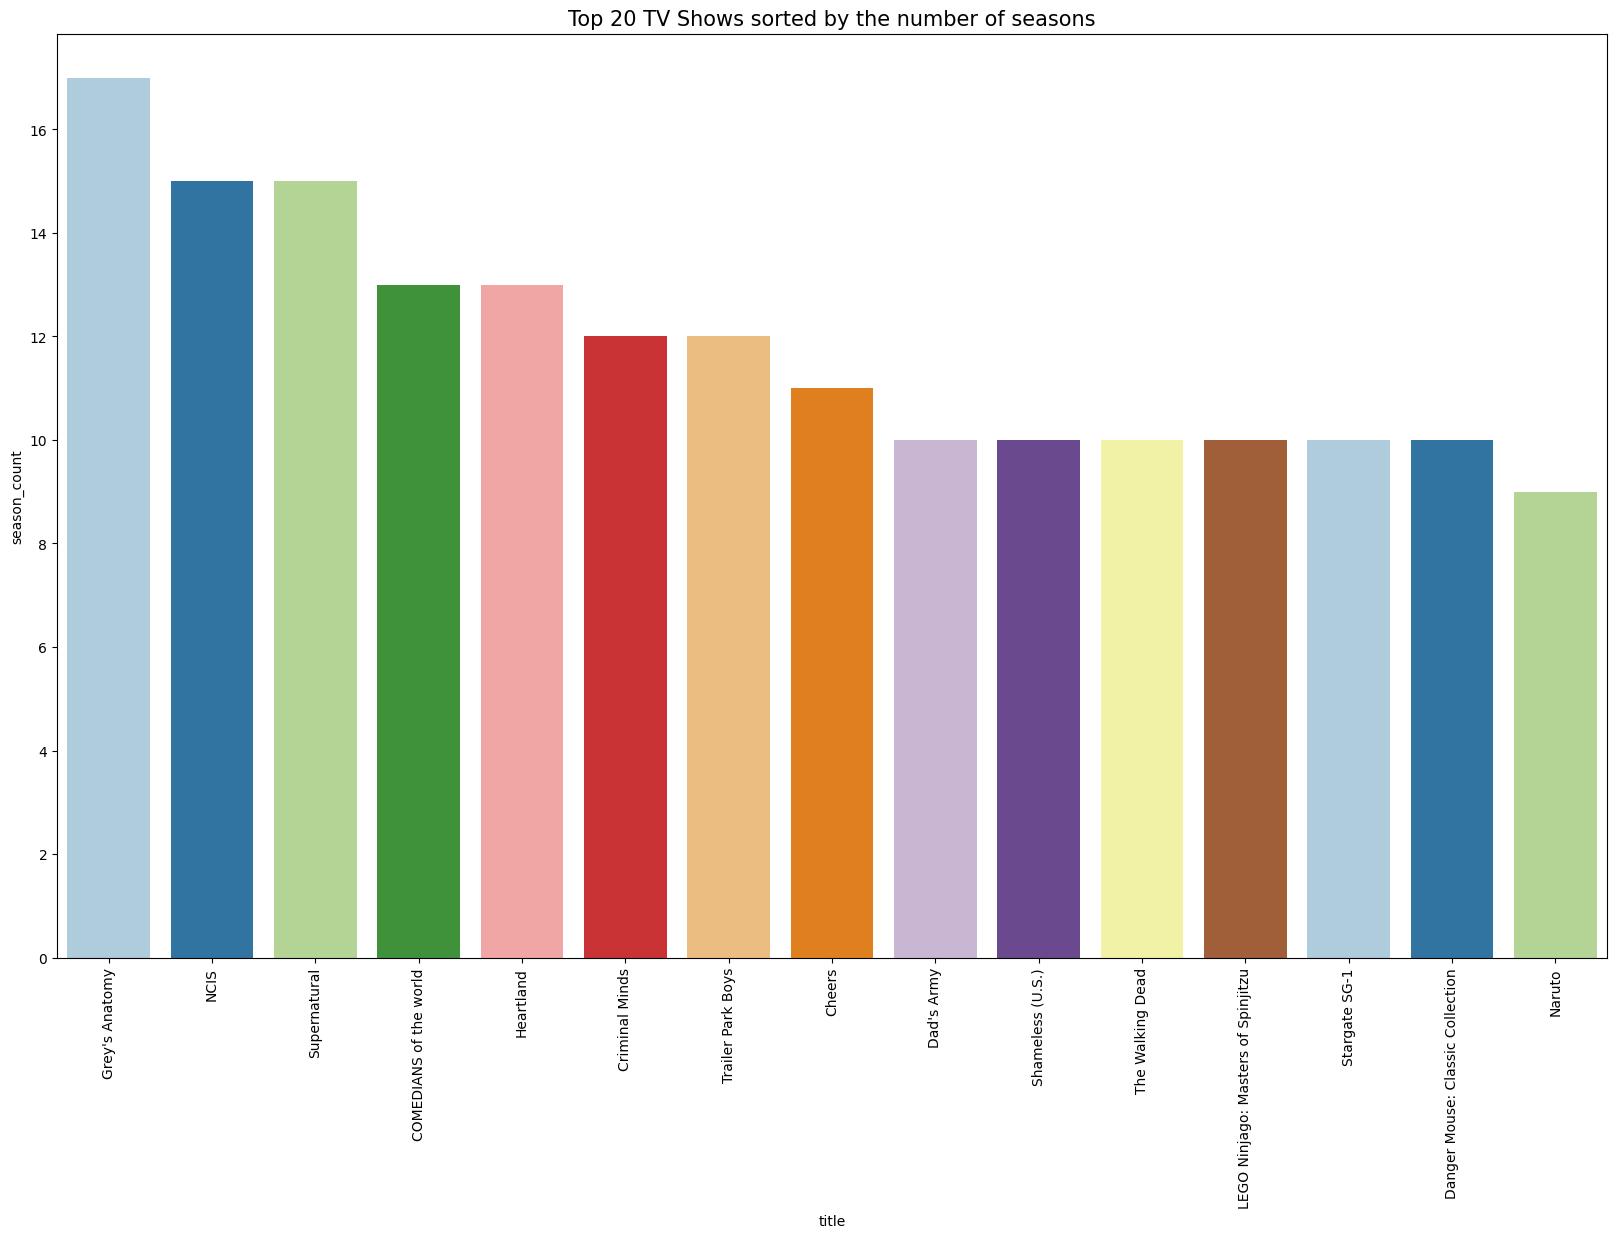

In [151]:
plt.figure(figsize = (20,12))
# Lets print the top 20 TV Shows by number of seasons.
top = 15
sns.barplot(x="title", y="season_count", data=sorted_season_df[0:top], palette=color)
plt.xticks(rotation=90);
plt.title('Top 20 TV Shows sorted by the number of seasons', size=15)
plt.show();

#Top 10 Actors by Number of Film to cast (Excluding Unknown Cast)

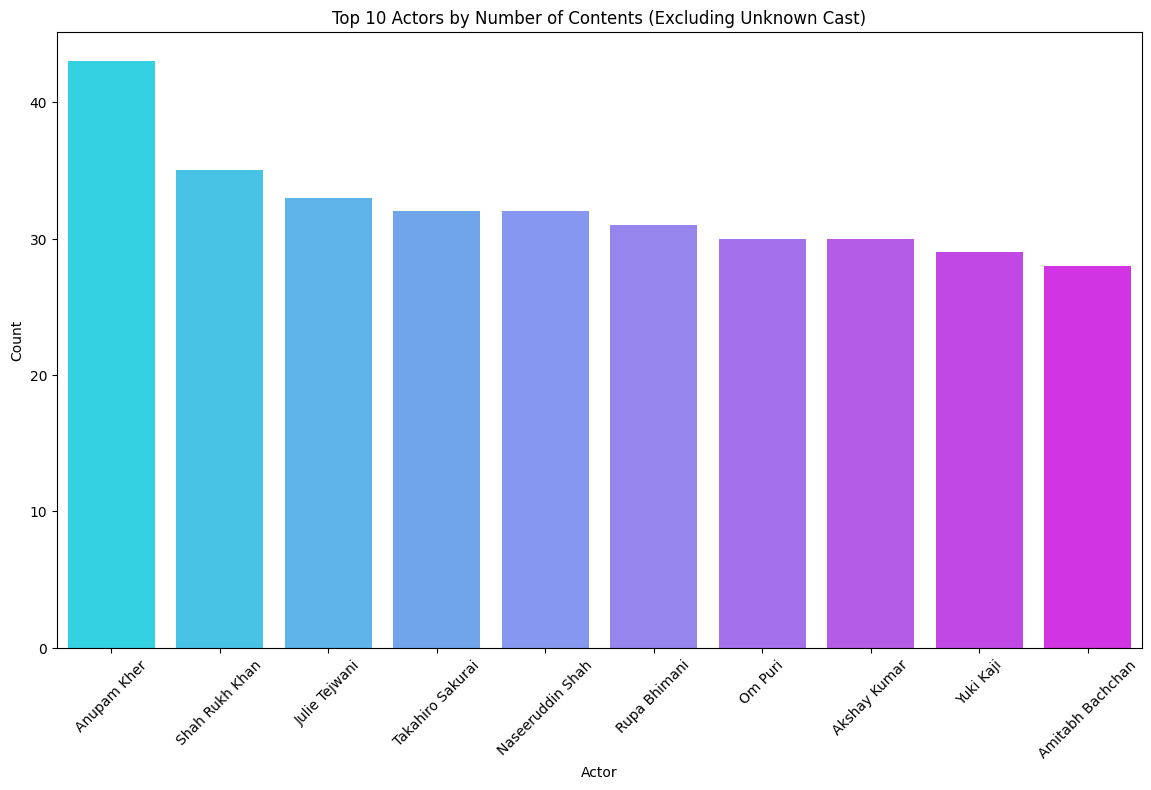

In [158]:
# Filter out rows with unknown cast
df_cleaned = df[df['cast'] != 'Unknown']

# Get the top 10 actors by number of contents
top_actors = df_cleaned['cast'].str.split(', ', expand=True).stack().value_counts().head(10)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x=top_actors.index, y=top_actors.values, palette='cool')
plt.title('Top 10 Actors by Number of Contents (Excluding Unknown Cast)')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Anupam kher has highest number of film cast(present in highest number of content)

##***Count of shows by number of seasons***

In [160]:
# Creating to dataframes regarding the type
df_tvshow = df.loc[df['type'] == 'TV Show']
df_movie = df.loc[df['type'] == 'Movie']

In [165]:
seasons_values = df_tvshow['duration'].value_counts()
seasons = seasons_values.sort_values(ascending=True)

fig = px.bar(y=seasons.index, x=seasons.values,
            labels = {'x' : 'Number of seasons', 'y' : 'Count'},
            text=seasons.values,
            orientation='h',
            title='Count of shows by number of seasons')
fig.update_traces(textposition='outside')

fig.show()

#Word Cloud of Titles and Descriptions

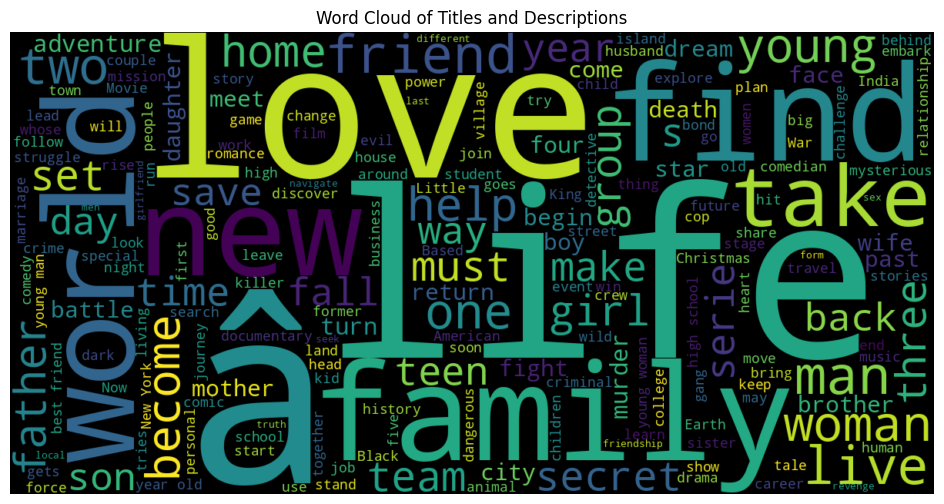

In [168]:
text = ' '.join(df['title'] + ' ' + df['description'])

wordcloud = WordCloud(width=1200, height=600, background_color='black').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Titles and Descriptions')
plt.axis('off')
plt.show()

##Conclusion
These visualizations collectively offer insights into various aspects of the Netflix dataset, including content distribution, production trends, and audience preferences.